In [ ]:
                                                        # LEVEL 1, TASK 1

In [ ]:
# LEVEL 1, TASK 1 - Data Exploration and Preprocessing

import pandas as pd
df = pd.read_csv("dataset.csv")  

In [4]:
print("Shape of the dataset:", df.shape)
print("Missing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (9551, 21)
Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

df.dropna(subset=['Aggregate rating'], inplace=True)


In [7]:
print(df['Aggregate rating'].value_counts())
print("\nNormalized distribution:")
print(df['Aggregate rating'].value_counts(normalize=True))


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

Normalized distribution:
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8   

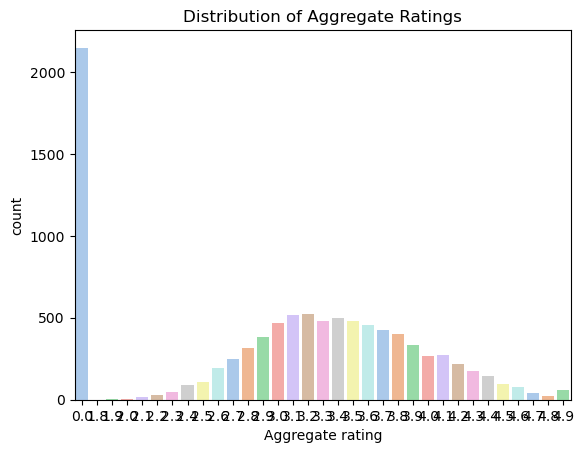

In [8]:
sns.countplot(x='Aggregate rating', data=df, palette='pastel')
plt.title("Distribution of Aggregate Ratings")
plt.show()


In [ ]:
                                                            # LEVEL 1, TASK 2

In [ ]:
# LEVEL 1, TASK 2 - Descriptive Analysis 

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 Restaurant ID           9.051128e+06
Country Code            1.836562e+01
Longitude               6.412657e+01
Latitude                2.585438e+01
Average Cost for two    1.199211e+03
Price range             1.804837e+00
Aggregate rating        2.666370e+00
Votes                   1.569097e+02
dtype: float64

Median:
 Restaurant ID           6.004089e+06
Country Code            1.000000e+00
Longitude               7.719196e+01
Latitude                2.857047e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64

Standard Deviation:
 Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64


In [11]:
country_map = {
    1: "India", 14: "Australia", 30: "Brazil", 37: "Canada", 94: "Indonesia",
    148: "New Zealand", 162: "Philippines", 166: "Qatar", 184: "Singapore", 
    189: "South Africa", 191: "Sri Lanka", 208: "Turkey", 214: "UAE", 215: "United Kingdom", 
    216: "United States"
}

df['Country'] = df['Country Code'].map(country_map)
print(df['Country'].value_counts())


Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Philippines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


In [12]:
print("Top 10 Cities by Number of Restaurants:")
print(df['City'].value_counts().head(10))


Top 10 Cities by Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [13]:
print("Top 10 Cuisines:")
print(df['Cuisines'].value_counts().head(10))


Top 10 Cuisines:
Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


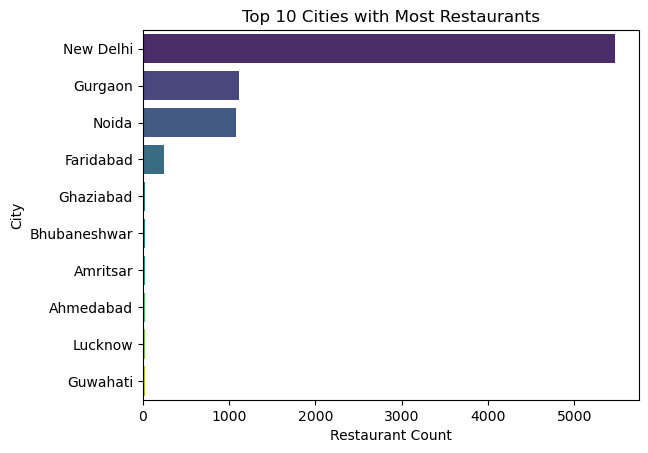

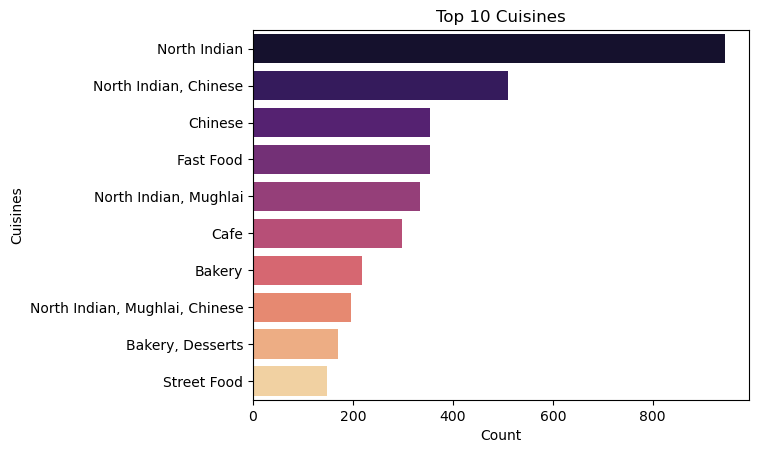

In [ ]:
# Visualizations 

import seaborn as sns
import matplotlib.pyplot as plt

# Top Cities
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Restaurant Count")
plt.ylabel("City")
plt.show()

# Top Cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma')
plt.title("Top 10 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisines")
plt.show()


In [ ]:
                                                           # LEVEL 1, TASK 3

In [ ]:
# LEVEL 1, TASK 3 - Geospatial Analysis

top_cities = df['City'].value_counts().head(10)
top_countries = df['Country Code'].value_counts().head(10)


In [17]:
# Correlation matrix
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation matrix:\n", correlation)


Correlation matrix:
                   Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


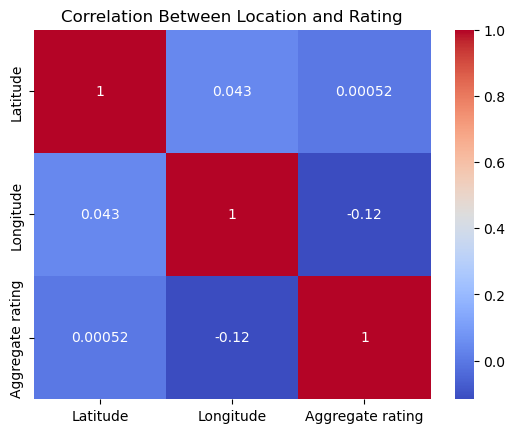

In [18]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Location and Rating")
plt.show()
